<a href="https://colab.research.google.com/github/ebzkurt1/ml_with_torch/blob/main/PyTorch_Beginning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset # Torch dataset class

%matplotlib inline

## Tensor 1D
Generating and examining 1D tensor using PyTorch.

### Creating a tensor
Creating a PyTorch tensor using a list, generating a tensor with specified dtype, generating a tensor by specifying the type of the tensor itself.

In [ ]:
data_list = [1.2,2.3,3.4,4.5,5.6]
# Generating a tensor using a list of float elements
a = torch.tensor(data_list) # a = torch.tensor([1.2,2.3,3.4,4.5,5.6])
# Generating the same tensor by specifying the dtype of the tensor
b = torch.tensor(data_list, dtype=torch.int32)
# Generating a tensor by specifying its type
c = torch.FloatTensor(data_list)
# Chaning the type of the tensor
a = a.type(torch.FloatTensor)

### Examining and accessing the tensor
Tensor can be accessed using the same indexing as Python list.

In [ ]:
# Accessing an element from the tensor
print("First element of the tensor accessed via indexing : ",a[0])
# Type of the tensor and elements of the tensor
print("Data type of the tensor : ",a.dtype)
print("Printing the type of the tensor itself : ",a.type())
print("Type of the tnesor generated by specifying its type : ", c.type())
# Size, dimension of the tensor
print("Size of the tensor", a.size())
print("Dimension of the tensor", a.ndimension())
# Changing dimensions
a_col = a.view(5,1) # a_col = a.view(-1,1)
print("Changed tensor dimension : ",a_col.ndimension())
print("Changed tensor size : ", a_col.size())

First element of the tensor accessed via indexing :  tensor(1.2000)
Data type of the tensor :  torch.float32
Printing the type of the tensor itself :  torch.FloatTensor
Type of the tnesor generated by specifying its type :  torch.FloatTensor
Size of the tensor torch.Size([5])
Dimension of the tensor 1
Changed tensor dimension :  2
Changed tensor size :  torch.Size([5, 1])


### Tensor creation
Tensor objects can be created using NumPy arrays, Pandas objects and so on. These objects then will be converted into Tensor objects, which can be accessed, manipulated just like numpy objects.

In [ ]:
# Generating a simple numpy array
numpy_array = np.array([0.0,2,0.3,4,2.6,1,6,3.8])
print("Sample numpy array : ", numpy_array)
# Converting numpy array into a tensor
torch_tensor = torch.from_numpy(numpy_array)
print("Numpy array as tensor : ", torch_tensor)
back_to_numpy = torch_tensor.numpy()
print("Tensor transformed back into numpy : ", back_to_numpy)
print("TENSOR AND NUMPY ARRAY ARE CONNECTED! Changing one changes other ones at the same time!")
# Cahning a single element of the numpy array
numpy_array[0]=66
print("All of them change at the same time : ",torch_tensor,back_to_numpy)

# Pandas objects can also be changed into tensors
pandas_series = pd.Series([2,5.3,7.1,4,71,8,7.4])
pandas_to_torch = torch.from_numpy(pandas_series.values)
print("Pandas series turned into tensor : ",pandas_to_torch)

# Tensor elements can be acccessed using slicing
print("Accessing tensor elements : ", pandas_to_torch[1:4])

Sample numpy array :  [0.  2.  0.3 4.  2.6 1.  6.  3.8]
Numpy array as tensor :  tensor([0.0000, 2.0000, 0.3000, 4.0000, 2.6000, 1.0000, 6.0000, 3.8000],
       dtype=torch.float64)
Tensor transformed back into numpy :  [0.  2.  0.3 4.  2.6 1.  6.  3.8]
TENSOR AND NUMPY ARRAY ARE CONNECTED! Changing one changes other ones at the same time!
All of them change at the same time :  tensor([66.0000,  2.0000,  0.3000,  4.0000,  2.6000,  1.0000,  6.0000,  3.8000],
       dtype=torch.float64) [66.   2.   0.3  4.   2.6  1.   6.   3.8]
Pandas series turned into tensor :  tensor([ 2.0000,  5.3000,  7.1000,  4.0000, 71.0000,  8.0000,  7.4000],
       dtype=torch.float64)
Accessing tensor elements :  tensor([5.3000, 7.1000, 4.0000], dtype=torch.float64)


### Creating evenly spaced tensor
Tensor can be generated by specifying start, end points with the step values. Result will be an evenly spaced tensor object. 

Operators can be used to manipulate tensor element values. For example 

```
tensor.sin()
```
can be used to take sin values of the entries within the tensor.


Evenly spaced tensor from -2 to 2 :  tensor([-2., -1.,  0.,  1.,  2.])


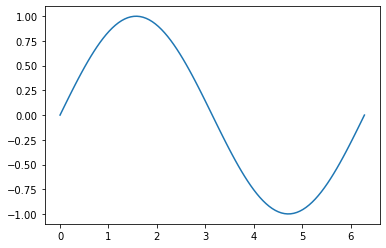

In [ ]:
# Torch can be used to generate evenly spaced tensor object
print("Evenly spaced tensor from -2 to 2 : ",torch.linspace(-2,2,steps=5))
x = torch.linspace(0, 2*np.pi, 100)
# Using sin opertor within torch itself
y = torch.sin(x)
# Plotting evenly spaced x values and corresponding sin values
# Tensors x and y should be converted into numpy before plotting
plt.plot(x.numpy(), y.numpy())

## Tensor 2D
Tensor objects can have multiple dimensions. They are not bound to be 1D vectors, they can also be 2D matrices.

In [ ]:
# Generating a 2D tensor
a = [[11,12,13],[21,22,23],[31,32,33]]
A = torch.tensor(a)
print("2D tensor : ", A)
print("Dimension of the tensor : ", A.ndimension())
print("Shape of the tensor : ",A.shape)
print("Size of the tensor : ", A.size())
print("Number of elements in the tensor : ", A.numel())
# 2D tensor can also be accessed using indexing
print("Accessing the tensor : ", A[0,0:2])

2D tensor :  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Dimension of the tensor :  2
Shape of the tensor :  torch.Size([3, 3])
Size of the tensor :  torch.Size([3, 3])
Number of elements in the tensor :  9
Accessing the tensor :  tensor([11, 12])


### Tensor operations
Operations such as addiditon, multiplication can be made using the tensors.

In [ ]:
X = torch.tensor([[1,0],[0,1]])
Y = torch.tensor([[2,1],[1,2]])
Z = X + Y
print("Addition of the tensors : ", Z)
T = 2 * Y # Broadcasting for multiplication
print("Multiplication result : ", T)
W = X*Y
print("Elementwise tensro multiplication : ", W)
A = torch.tensor([[0,1,1],[1,0,1]])
B = torch.tensor([[1,1],[1,1],[-1,1]])
C = torch.mm(A,B) # Matrix multiplication
print("PyTorch matrix multiplication result : ", C)

Addition of the tensors :  tensor([[3, 1],
        [1, 3]])
Multiplication result :  tensor([[4, 2],
        [2, 4]])
Elementwise tensro multiplication :  tensor([[2, 0],
        [0, 2]])
PyTorch matrix multiplication result :  tensor([[0, 2],
        [0, 2]])


### Gradient operations within tensors

In [ ]:
# Generating a differentiable tensor
x = torch.tensor(2.0, requires_grad=True)
# Sepecifying the function
y = x**2
# Computing the gradient
y.backward()
# Calculating the gradinet w.r.t. the x
print("Gradient of x : ", x.grad)

u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)
f = u*v + u**2
f.backward()
print("Gradient w.r.t. u : ", u.grad)
print("Gradient w.r.t. v : ", v.grad)

Gradient of x :  tensor(4.)
Gradient w.r.t. u :  tensor(4.)
Gradient w.r.t. v :  tensor(1.)


## Simple Dataset
Datasets can be accessed and read using Dataset class of the PyTorch. Custom datasets can be created using the Dataset class.

Dataset class can be used to initialize the dataset.

In [ ]:
# Creating a custom toy dataset
class toy_set(Dataset):
  def __init__(self, length=100,transform=None):
    # Initializing the dataset
    self.x = 2 * torch.ones(length,2)
    self.y = torch.ones(length,1)
    self.len = length
    self.transform = transform
  def __getitem__(self,index):
    sample = self.x[index],self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample
  def __len__(self):
    return self.len

Transform classes can be used to directly transform the data. Dataset indexes can be accessed by indexing and then can be transformed.

In [ ]:
class add_mult(object):
  def __init__(self, addx=1,muly=1):
    self.addx= addx
    self.muly = muly
  def __call__(self,sample):
    x = sample[0]
    y = sample[1]
    x = x + self.addx
    y = y * self.muly
    sample = x,y
    return sample

class mult(object):
  def __init__(self, mul=100):
    self.mul = mul
  def __cal__(self,sample):
    x = sample[0]
    y = sample[1]
    x = x * self.mul
    y = y * self.mul
    sample = x,y
    return sample

In [ ]:
dataset = toy_set()
print("Length of the custom dataset : ", len(dataset))

a_m = add_mult() # Generating transform object
# Using transform object on one of the dataset elements
x_,y_ = a_m(dataset[0])
print("Dataset value before transform : ", dataset[0])
print("Result of the transform : ",x_,y_)
# Transform object can be directly fed into the dataset as well
dataset_ = toy_set(transform=a_m)

from torchvision import transforms
# Transform objects can be chained together as follows
data_transform = transforms.Compose(
    [add_mult()]
)
X_,y_ = data_transform(dataset[0])
data_set_tr = toy_set(transform=data_transform)

Length of the custom dataset :  100
Dataset value before transform :  (tensor([2., 2.]), tensor([1.]))
Result of the transform :  tensor([3., 3.]) tensor([1.])


## Linear Regression using PyTorch
Linear regression model can be written from almost scratch using PyTorch.

First we generate a dummy data and then we perform the learning

Text(0, 0.5, 'y')

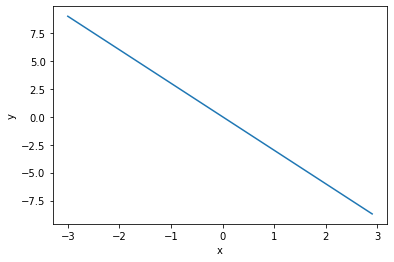

In [ ]:
# Generating a data
X = torch.arange(-3,3,0.1).view(-1,1) # Changing the dimension to acquire a matrix
f = -3 * X # Target line

plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')

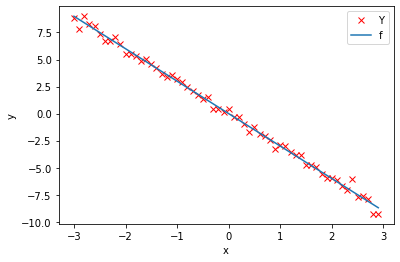

In [ ]:
Y = f + 0.3 * torch.randn(X.size()) # Acquiring target variables by adding random noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Now we can start building our model structure

In [ ]:
def forward(x, w, b):
  """
  Model feed forward

  x: input value
  w: weight
  b: bias
  """
  return w*x + b

def criterion(yhat,y):
  """
  Loss calculation

  yhat: prediction
  y: real value
  """
  return torch.mean((yhat-y)**2)

In [ ]:
lr = 0.1 # Model learning rate
LOSS = [] # List for saving the epoch loss
# Initializing the parameters
w = torch.tensor(-10.0,requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)

In [ ]:
def train_model(iter, X, Y, w, b, LOSS):
  """
  Function for training the model
  """
  # Iterating through the epochs
  for epoch in range(iter):
    # Calculating the predictions
    Yhat = forward(X, w, b)
    # Calculating loss using criterion function
    loss = criterion(Yhat, Y)
    # Adding epoch loss to the list
    LOSS.append(loss.item())
    # Taking gradient
    loss.backward()
    # Updating the model parameters using gradient descend
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    b.data = b.data - lr * b.grad.data
    b.grad.data.zero_()

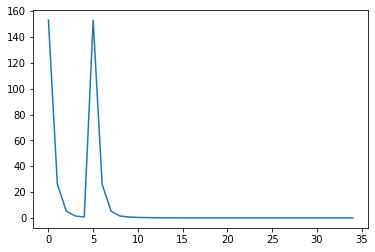

In [ ]:
train_model(15, X,Y,w,b,LOSS)
plt.plot(LOSS)

### Linear Regression with SGD
Same Linear Regression system can also be constructed using Stochastic Gradient Descent

In [ ]:
lr = 0.1 # Model learning rate
LOSS_STOCH = [] # List for saving the epoch loss
# Initializing the parameters
w = torch.tensor(-10.0,requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
def train_stochastic(iter, X, Y, w, b, LOSS_STOCH):
  for epoch in range(iter):
    Yhat = forward(X, w, b)
    LOSS_STOCH.append(criterion(Yhat,Y).item())
    for x,y in zip(X,Y):
      yhat = forward(x,w,b)
      loss = criterion(yhat,y)
      loss.backward()
      w.data = w.data - lr * w.grad.data
      w.grad.data.zero_()
      b.data = b.data - lr * b.grad.data
      b.grad.data.zero_()

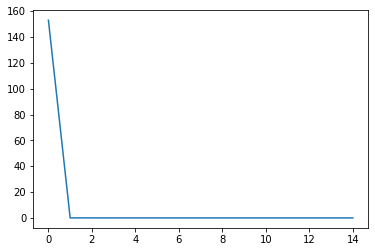

In [ ]:
train_stochastic(15, X,Y,w,b,LOSS_STOCH)
plt.plot(LOSS_STOCH)

### SGD with PyTorch Dataloader
Now we can use PyTorch DataLoader object while applying stochastic gradient descent

In [ ]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * self.x - 0.3 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [ ]:
dataset = Data()
print("The length of dataset: ", len(dataset))

x, y = dataset[0]
print("(", x, ", ", y, ")")

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)
# Creating a DataLoader object with specified batch_size
trainloader = DataLoader(dataset = dataset, batch_size = 1)

The length of dataset:  60
( tensor([-3.]) ,  tensor([9.0644]) )
The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[9.0644],
        [8.0700],
        [8.5895]])


In [ ]:
lr = 0.1 # Model learning rate
LOSS_dataloader = [] # List for saving the epoch loss
# Initializing the parameters
w = torch.tensor(-10.0,requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
def train_dataloader(iter,X,Y,w,b):
  for epoch in range(iter):
    Yhat = forward(X,w,b)
    loss=criterion(Yhat,Y)
    LOSS_dataloader.append(loss.item())
    loss.backward()
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    b.data = b.data - lr * b.grad.data
    b.grad.data.zero_()

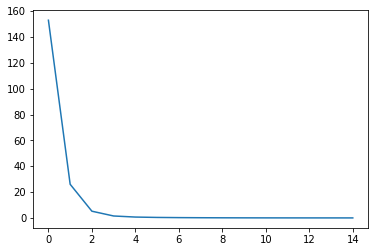

In [ ]:
train_dataloader(15, X,Y,w,b)
plt.plot(LOSS_dataloader)

### Linear Regression PyTorch intended way

In [ ]:
class torch_linear_regression(nn.Module):
  def __init__(self, input_size, out_size):
    super(torch_linear_regression, self).__init__()
    self.linear = nn.Linear(input_size,out_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

criterion = nn.MSELoss()
model = torch_linear_regression(1,1)
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3962]], requires_grad=True), Parameter containing:
 tensor([-0.5513], requires_grad=True)]

In [ ]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {}}

In [ ]:
# model parameters can be changed manually as well
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [ ]:
def train_model_minibatch(iter):
  for epoch in range(iter):
    for x,y in trainloader:
      yhat = model(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()

      optimizer.step()
# Training the linear regression model
train_model_minibatch(15)

In [ ]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-3.0012]])),
             ('linear.bias', tensor([0.0036]))])

### Saving model and checkpoints

In [ ]:
checkpoint_path = 'checkpoint_model.pt'
checkpoint = {
    'epoch':None,
    'model_state_dict':None,
    'optimizer_state_dict':None,
    'loss':None
}

In [ ]:
criterion = nn.MSELoss()
model = torch_linear_regression(1,1)
optimizer = optim.SGD(model.parameters(),lr=0.01)
epochs = 15
LOSS_Train = []
for epoch in range(epochs):
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_train = criterion(model(dataset.x),dataset.y).item()
    LOSS_Train.append(loss_train)
  
  checkpoint['epoch']=epoch
  checkpoint['model_state_dict']=model.state_dict()
  checkpoint['optimizer_state_dict'] = optimizer.state_dict()
  checkpoint['loss'] = loss
  torch.save(checkpoint,checkpoint_path)

In [ ]:
checkpoint = torch.load(checkpoint_path)
checkpoint

{'epoch': 14,
 'loss': tensor(0.0147, requires_grad=True),
 'model_state_dict': OrderedDict([('linear.weight', tensor([[-3.0012]])),
              ('linear.bias', tensor([0.0036]))]),
 'optimizer_state_dict': {'param_groups': [{'dampening': 0,
    'lr': 0.01,
    'momentum': 0,
    'nesterov': False,
    'params': [0, 1],
    'weight_decay': 0}],
  'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}}}

In [ ]:
# Creating a new model
model_checkpoint = torch_linear_regression(1,1)
print(model_checkpoint.state_dict())
# Loading model using the checkpoint
model_checkpoint.load_state_dict(checkpoint['model_state_dict'])
print(model_checkpoint.state_dict())
# Creating a new optimizer
optimizer = optim.SGD(model_checkpoint.parameters(), lr = 1)
print(optimizer.state_dict())
# Loading the optimizer using the checkpoint
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print(optimizer.state_dict())

loss =checkpoint['loss']
print('loss:',loss)

OrderedDict([('linear.weight', tensor([[0.7844]])), ('linear.bias', tensor([0.2985]))])
OrderedDict([('linear.weight', tensor([[-3.0012]])), ('linear.bias', tensor([0.0036]))])
{'state': {}, 'param_groups': [{'lr': 1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
loss: tensor(0.0147, requires_grad=True)
